In [ ]:
#!pip install numpy
#!pip install pandas
#!pip install seaborn
#!pip install matplotlib

## 1. Linear Regression

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10, 6)  # figure szie ı fix lemek için kullanılır
import warnings
warnings.filterwarnings('ignore')   # uyarıların göz ardı edilmesi için

## 2.Read Data Set

In [2]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


independent variables = feature = estimator = attribute = input 

dependent variables = target = label = output

rows: observation - samples


Features: TV - radio - newspaper

Target  : Sales

In [3]:
df.info()  #reflex olarak yazılacak komutlardan birisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.head()  # verinin baş kısmına bakalım

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [5]:
df.tail()  # verinin son kısmına bakalım

,TV,radio,newspaper,sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [6]:
df.sample(5)  # randomly 5 adet veri satırını getirir

,TV,radio,newspaper,sales
122,224.0,2.4,15.6,11.6
141,193.7,35.4,75.6,19.2
33,265.6,20.0,0.3,17.4
129,59.6,12.0,43.1,9.7
144,96.2,14.8,38.9,11.4


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


## 3.1 Correlation

In [8]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


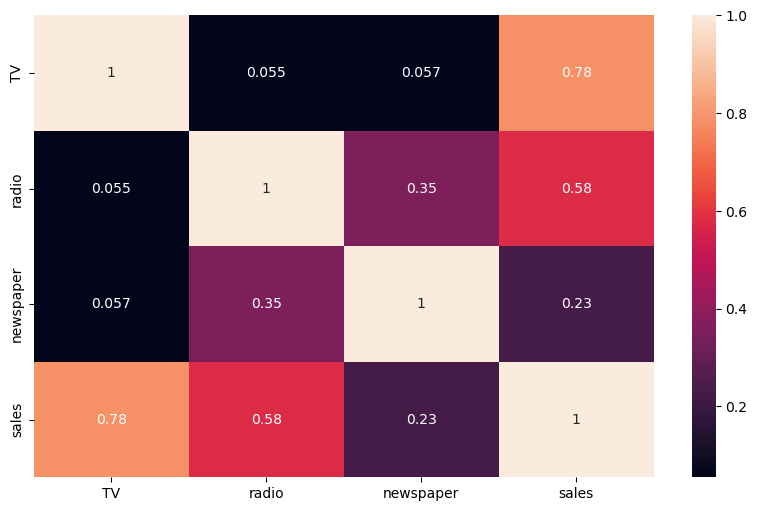

In [9]:
sns.heatmap(df.corr(), annot=True);

#aanot=True : hücrelerd erakamların yazılması için 

#### **multicollinearity nedir?**

**Multicollinearity** occurs when two or more independent variables in a regression model are highly correlated with each other.

- Multicollinearity varsa featurelarin birbirileriyle iliskileri, korelasyonu fazladir.

- C ve F mesela ikisi de ayni seyi soyluyor bize. ikisi arasindaki iliski cok yuksektir.

- Biz featurelarin korelasyonunun kendi arasinda dusuk, target var ile cok yuksek olmasini isteriz.

- Multicollinearity durumunu istemeyiz, overfitting'e neden olur.

## 3.2 Create new independent variable (yeni bir feature oluşturalım) feature engineering

In [ ]:
# bu nottebook da simple linear regression konusu incelendiği için  //
# // tek feature ve tek target variable olmalıdır.

In [ ]:
# total_spend = Toplam Harcama

In [10]:
df["total_spend"] = df.TV + df.radio + df.newspaper
df

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


In [12]:
df = df.iloc[:, [0,1,2,4,3]]  # sales degerini df de en sonda gostermek ıcın
df

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9
...,...,...,...,...,...
195,38.2,3.7,13.8,55.7,7.6
196,94.2,4.9,8.1,107.2,9.7
197,177.0,9.3,6.4,192.7,12.8
198,283.6,42.0,66.2,391.8,25.5
